Ariel Yogev 207917501 Guy Ben Moshe 318363397 


[Kaggle](https://www.kaggle.com/guybenmoshe)

**About**
>In this competition, we focused on predicting house prices based on given data.
During our work, we identified which features influence house prices more and tried to create a model that best predicts the house price.
We tried to predict house prices by using Linear regression and also by SGD regression for comparing what will provied the best score and the lowest RMSE. 





In [1]:
# We update packages that their Colab version is too old.  
!pip install --upgrade plotly
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.18.0
    Uninstalling plotly-5.18.0:
      Successfully uninstalled plotly-5.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 71.9 MB/s eta 0:00:00:00:0100:01


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default ='notebook'

from ydata_profiling import ProfileReport



# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from tqdm.auto import tqdm

In [4]:
hp_train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
hp_train_df.reset_index(drop=True, inplace=True)
display(hp_train_df)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

the full table before changes

In [5]:
hp_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can see that thare are colunms with null values

**#report**

In [6]:
'''
#report
ProfileReport(hp_train_df, title="House prices Profiling Report",explorative=True)
'''

'\n#report\nProfileReport(hp_train_df, title="House prices Profiling Report",explorative=True)\n'

In [7]:
missing_values = hp_train_df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_percentage = (missing_values / len(hp_train_df)) * 100

print(missing_percentage)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


We wanted to see how much precent of each colunm is null.

In [8]:
hp_train_df_ch = hp_train_df.copy()

columns_to_drop = missing_percentage[missing_percentage > 60].index

hp_train_df_ch.drop(columns=columns_to_drop, inplace=True)

print(hp_train_df_ch)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ... 

We decided to drop colunms with more than 40% null values

In [9]:
hp_train_df_ch

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ...             0         0           0   
1            Lvl    AllPub       FR2  ...             0         0           0   
2            Lvl    AllPub    Inside  ...             0         0           0   
3            Lvl    AllPub    Corner  ...           272         0           0   
4            Lvl    AllPub       FR2  ...             0         0           0   
...          ...       ...       ...  ...           ...       ...         ...   
1455         Lvl    AllPub    Inside  ...             0         0           0   
1456         Lvl    AllPub    Inside  ...             0         0           0   
1457         Lvl    AllPub    Inside  ...             0         0           0   
1458         Lvl    AllPub    Inside  ...           112         0           0   
1459         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           0       0      2    2008        WD         Normal     208500  
1           0       0      5    2007        WD         Normal     181500  
2           0       0      9    2008        WD         Normal     223500  
3           0       0      2    2006        WD        Abnorml     140000  
4           0       0     12    2008        WD         Normal     250000  
...       ...     ...    ...     ...       ...            ...        ...  
1455        0       0      8    2007        WD         Normal     175000  
1456        0       0      2    2010        WD         Normal     210000  
1457        0    2500      5    2010        WD         Normal     266500  
1458        0       0      4    2010        WD         Normal     142125  
1459        0       0      6    2008        WD         Normal     147500  

[1460 rows x 77 columns]

In [10]:
hp_train_df_ch.drop(columns=['Id'], inplace=True)

hp_train_df_ch

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 76 columns]

We dropped the id feature neither.

In [11]:
# Find columns with only one unique value
single_value_columns = [col for col in hp_train_df_ch.columns if hp_train_df_ch[col].nunique() == 1]

# Drop the columns with only one unique value
hp_train_df_ch = hp_train_df_ch.drop(columns=single_value_columns)

# Print the cleaned DataFrame
print("Dropped columns:", single_value_columns)


Dropped columns: []


We checked if there is a columns with only one uniq value. we can see that there isn't.

In [12]:
for column in hp_train_df_ch.columns:
    if hp_train_df_ch[column].dtype == "float64" or hp_train_df_ch[column].dtype == "int64":
        hp_train_df_ch[column] = hp_train_df_ch[column].fillna(hp_train_df_ch[column].median())
    else:
        hp_train_df_ch[column] = hp_train_df_ch[column].fillna(hp_train_df_ch[column].mode()[0])

hp_train_df_ch.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 76 columns]

Here we replaced numeric missing values with the avarege value and an objects missing values with the most frequent value of that column.

In [13]:
hp_train_df_ch.isnull().sum().sum()

0

In [14]:
hp_train_df_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

We can see that we took care of all the missing values and now we can start train the model

In [15]:
hp_train_df_ch

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 76 columns]

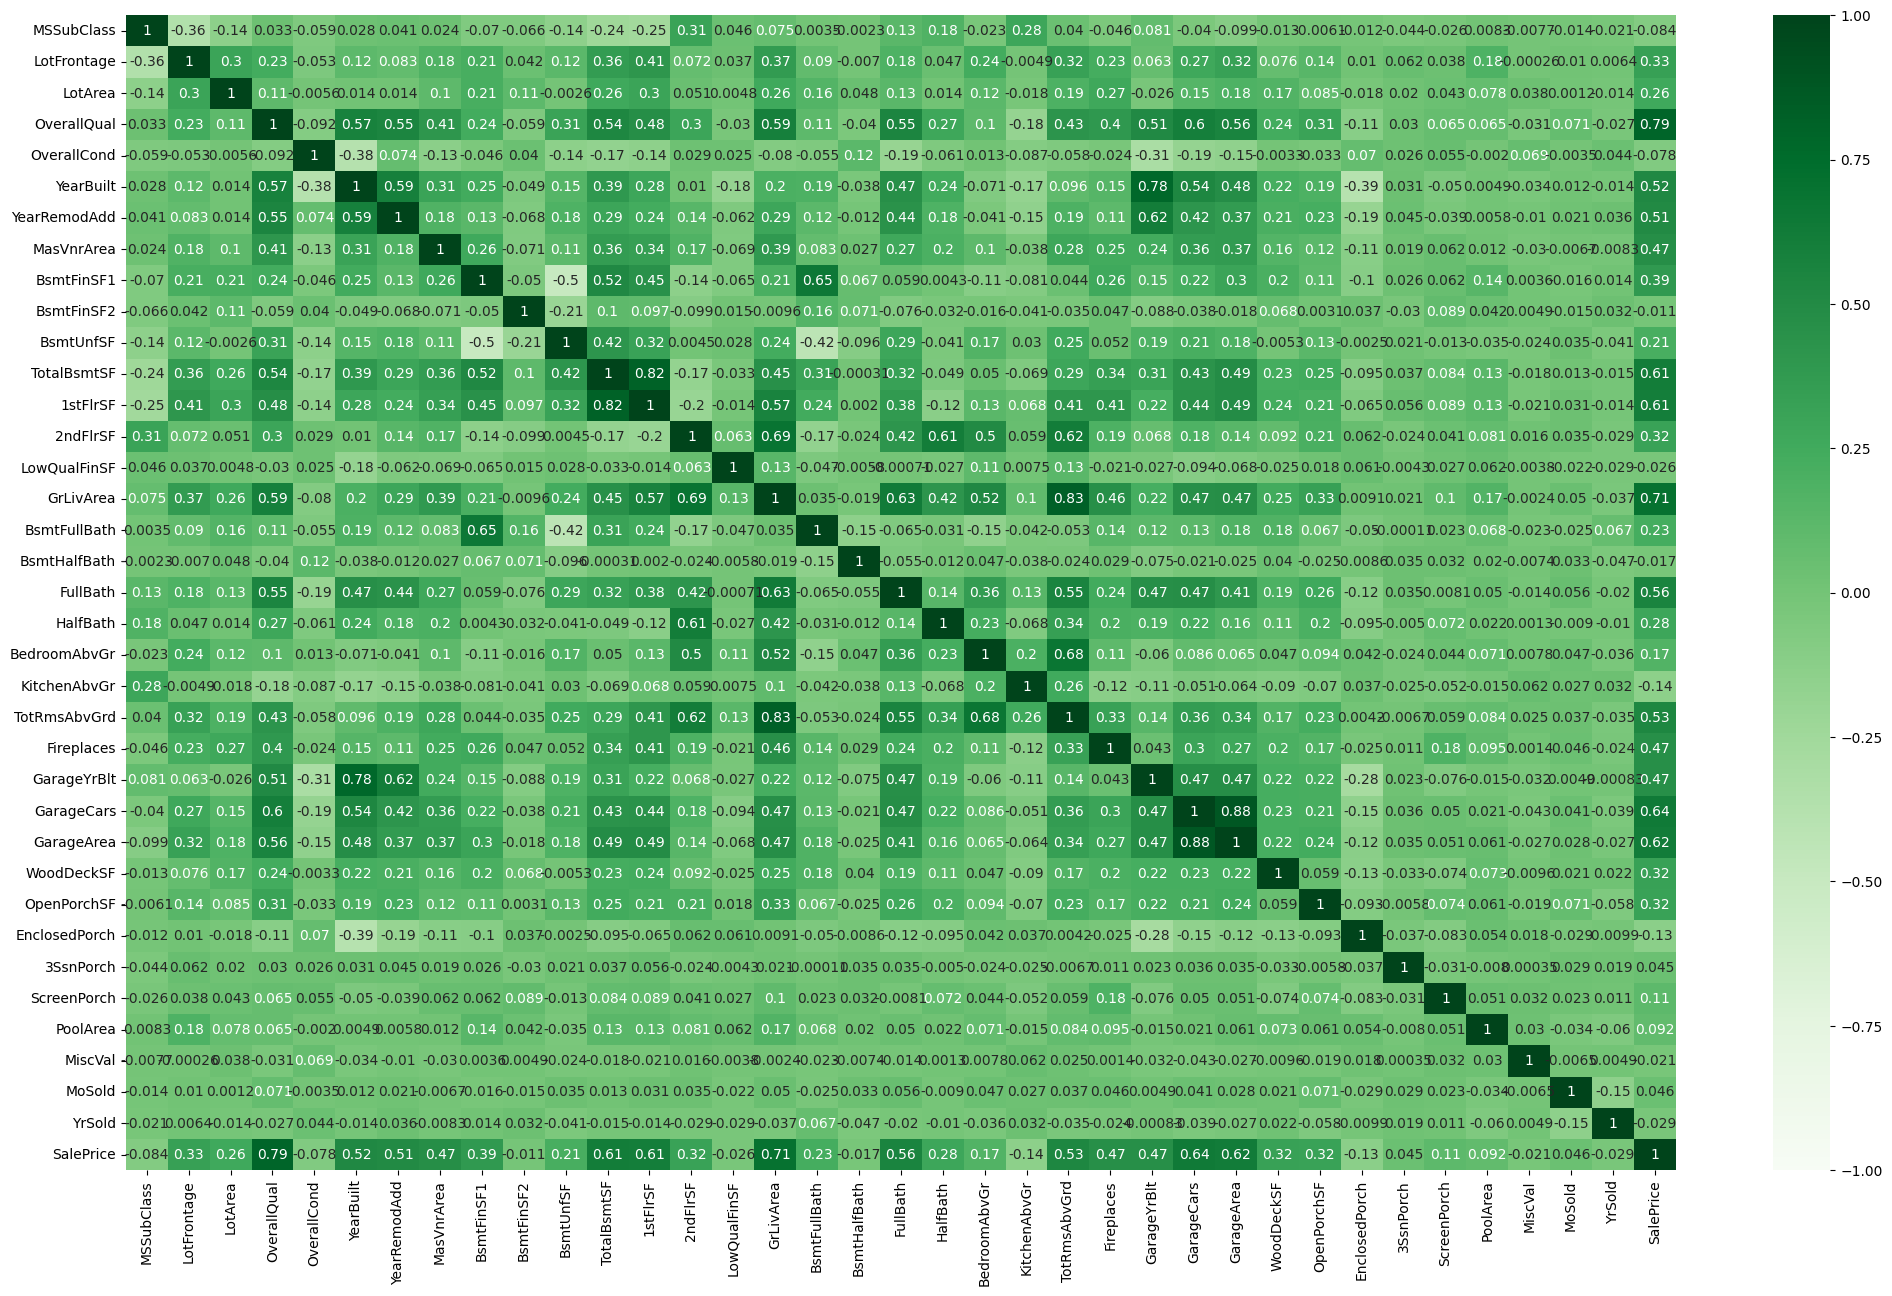

In [16]:
plt.figure(figsize=(25,15))
cor = hp_train_df_ch.select_dtypes(exclude=['object']).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens, vmin=-1, vmax=1)
plt.show()

Correlation table before features drop

In [17]:
hp_train_df_ch.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [18]:

hp_train_df_ch_drop = hp_train_df_ch.copy()

# Assuming df is your dataframe and 'target' is the name of your target variable column
target = 'SalePrice'  # Replace with actual target variable name
corr_threshold = 0.1  # Set your correlation threshold

# Calculate correlations with the target variable
correlations = hp_train_df_ch_drop.select_dtypes(exclude=['object']).corr()[target].abs()

# Identify features with correlation less than the threshold
low_corr_features = correlations[correlations < corr_threshold].index.tolist()

# Drop these features from your dataframe
hp_train_df_ch_drop = hp_train_df_ch_drop.drop(low_corr_features, axis=1)

# Now df contains only the features that have at least 20% correlation with the target variable
low_corr_features


['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

Here we decided to drop features that has less than 20% correlation with target

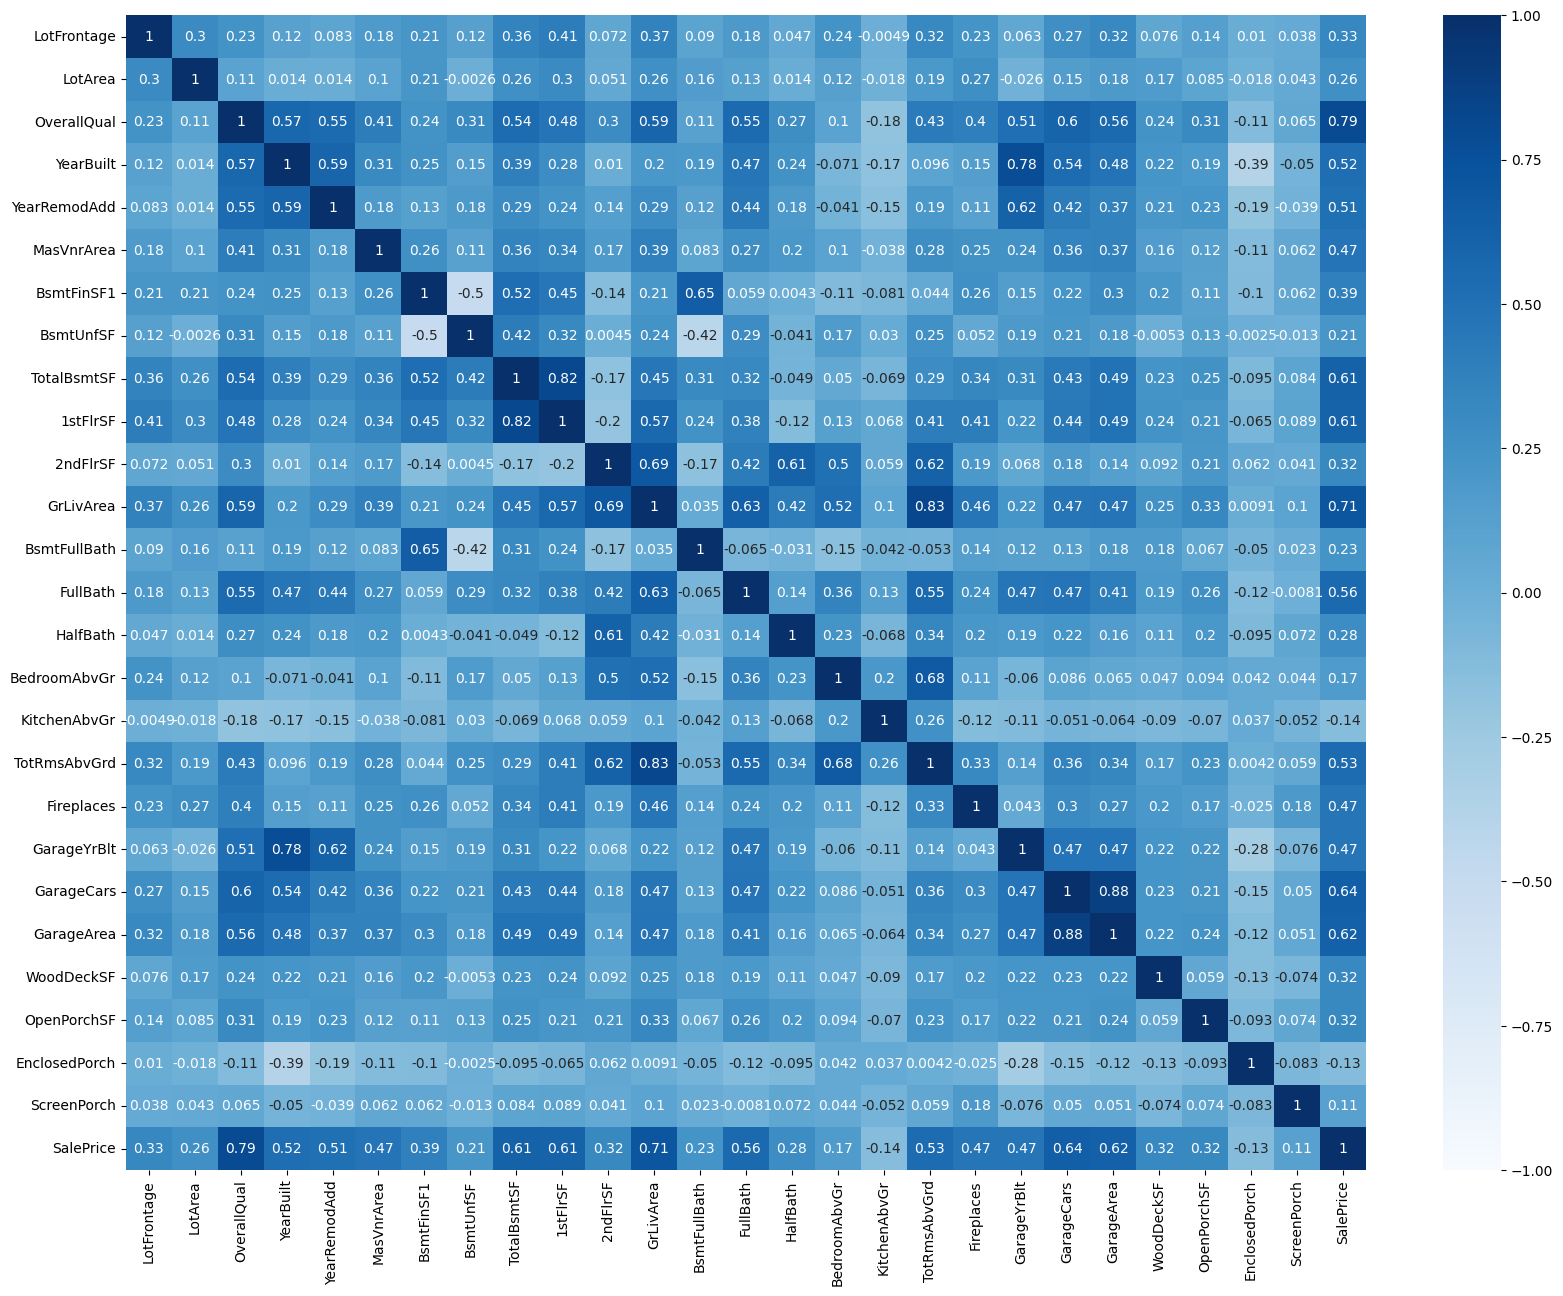

In [19]:
plt.figure(figsize=(20,15))
cor = hp_train_df_ch_drop.select_dtypes(exclude=['object']).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues, vmin=-1, vmax=1)
plt.show()

Here we can see the correlation table.
we can tell that the feature 'overallQual'has very high correlation with the target for example

In [20]:
t = hp_train_df_ch_drop['SalePrice'].copy()
X = hp_train_df_ch_drop.drop(['SalePrice'], axis=1)

In [21]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)
print('All Cols:', all_cols)

Numerical Cols: Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch'],
      dtype='object')
Categorical Cols: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
    

Here we splits the columns by type for future encoding

In [22]:
import plotly.graph_objects as go
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None,
                          k=None,
                          p=None,
                          show_score_loss_graphs=False):
  
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True,random_state=42)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        # from index to record assignment
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        # fit and predict
        model.fit(X_train, t_train)
        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        
        # assign results into scores df
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train),
                                                       np.sqrt(mean_squared_error(t_train, y_train))]
        scores_losses_df.loc[len(scores_losses_df)] =[i, 'val', model.score(X_val, t_val),
                                                      np.sqrt(mean_squared_error(t_val, y_val))]

    #split into two dfs , val and train
    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    #calculate mean score and loss for train and validation across all models
    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()
        display(scores_losses_df)


    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

Here we checked what is the model that will bring us the best score

In [23]:
def evaluate_model(X, model):
    val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model, k=5, show_score_loss_graphs=True)
    print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
    print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

In [24]:
# use column transformer to insert different transformers for each column
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
                        ("encoding",OrdinalEncoder(),categorical_cols),
                        ("standard_poly",StandardScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct.fit_transform(X, t), columns=all_cols)

Here we did normalization for numeric values and encoding for categorical values

In [25]:
# find best subset of features on this dataset with SGDRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

selector_sgd = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, t)
X_selected_features_sgd = X_encoded.loc[:, selector_sgd.support_]
display(X_selected_features_sgd)

MSZoning  LotFrontage  Street  Utilities  LandSlope  Neighborhood  \
0          3.0          1.0     3.0        0.0        2.0           2.0   
1          3.0          1.0     3.0        0.0        1.0           2.0   
2          3.0          1.0     3.0        0.0        2.0           2.0   
3          3.0          1.0     3.0        0.0        2.0           2.0   
4          3.0          1.0     3.0        0.0        2.0           2.0   
...        ...          ...     ...        ...        ...           ...   
1455       3.0          1.0     3.0        0.0        2.0           2.0   
1456       3.0          1.0     3.0        0.0        2.0           2.0   
1457       3.0          1.0     3.0        0.0        2.0           2.0   
1458       3.0          1.0     3.0        0.0        2.0           2.0   
1459       3.0          1.0     3.0        0.0        2.0           2.0   

      Condition2  BldgType  YearRemodAdd  RoofStyle  ...  BsmtFullBath  \
0            5.0       1.0           1.0        2.0  ...      0.651479   
1            2.0       1.0           1.0        3.0  ...     -0.071836   
2            5.0       1.0           1.0        2.0  ...      0.651479   
3            5.0       1.0           1.0        3.0  ...      0.651479   
4            5.0       1.0           1.0        2.0  ...      1.374795   
...          ...       ...           ...        ...  ...           ...   
1455         5.0       1.0           1.0        3.0  ...     -0.071836   
1456         2.0       1.0           2.0        3.0  ...     -0.071836   
1457         5.0       1.0           1.0        0.0  ...      0.651479   
1458         2.0       3.0           1.0        3.0  ...     -0.795151   
1459         2.0       1.0           1.0        2.0  ...     -0.795151   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  FireplaceQu  \
0     0.878668      0.514104      0.575425     -0.459303     0.370333   
1    -0.429577     -0.570750      1.171992      0.466465    -0.482512   
2     0.830215      0.325915      0.092907     -0.313369     0.515013   
3    -0.720298     -0.570750     -0.499274     -0.687324     0.383659   
4     0.733308      1.366489      0.463568      0.199680     1.299326   
...        ...           ...           ...           ...          ...   
1455  0.733308     -0.570750     -0.973018     -0.238122     0.250402   
1456  0.151865      0.087911      0.759659      1.104925     1.061367   
1457  1.024029     -0.570750     -0.369871      0.215641     1.569647   
1458  0.539493     -0.570750     -0.865548      0.046905    -0.832788   
1459 -0.962566     -0.570750      0.847389      0.452784    -0.493934   

      GarageType  GarageCars  GarageCond  OpenPorchSF  
0       1.107810    0.163779   -0.951226     0.351000  
1      -0.819964    0.163779    0.600495    -0.060731  
2       1.107810    0.163779    0.600495     0.631726  
3       1.107810    0.163779    0.600495     0.790804  
4       1.107810    1.390023    0.600495     1.698485  
...          ...         ...         ...          ...  
1455   -0.819964    0.163779    0.600495    -0.060731  
1456    1.107810    0.163779    2.152216     0.126420  
1457   -0.819964    1.390023    2.152216    -1.033914  
1458    1.107810   -1.062465   -0.951226    -1.090059  
1459    1.107810    0.163779   -0.951226    -0.921624  

[1460 rows x 32 columns]

Here we wanted to see which features will give us the best score for Sgd reggression

In [26]:
# find best subset of features on this dataset with LinearRegression
selector_lr = RFECV(LinearRegression(), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)).fit(X_encoded, t)
X_selected_features_lr = X_encoded.loc[:, selector_lr.support_]
display(X_selected_features_lr)

MSZoning  LotFrontage  LotArea  Street  LotShape  Utilities  \
0          3.0          1.0      3.0     3.0       0.0        0.0   
1          3.0          1.0      3.0     3.0       0.0        0.0   
2          3.0          1.0      0.0     3.0       0.0        0.0   
3          3.0          1.0      0.0     3.0       0.0        0.0   
4          3.0          1.0      0.0     3.0       0.0        0.0   
...        ...          ...      ...     ...       ...        ...   
1455       3.0          1.0      3.0     3.0       0.0        0.0   
1456       3.0          1.0      3.0     3.0       0.0        0.0   
1457       3.0          1.0      3.0     3.0       0.0        0.0   
1458       3.0          1.0      3.0     3.0       0.0        0.0   
1459       3.0          1.0      3.0     3.0       0.0        0.0   

      Neighborhood  Condition1  Condition2  BldgType  ...  GarageType  \
0              2.0         0.0         5.0       1.0  ...    1.107810   
1              2.0         0.0         2.0       1.0  ...   -0.819964   
2              2.0         0.0         5.0       1.0  ...    1.107810   
3              2.0         0.0         5.0       1.0  ...    1.107810   
4              2.0         0.0         5.0       1.0  ...    1.107810   
...            ...         ...         ...       ...  ...         ...   
1455           2.0         0.0         5.0       1.0  ...   -0.819964   
1456           2.0         0.0         2.0       1.0  ...    1.107810   
1457           2.0         0.0         5.0       1.0  ...   -0.819964   
1458           2.0         0.0         2.0       3.0  ...    1.107810   
1459           2.0         0.0         2.0       1.0  ...    1.107810   

      GarageYrBlt  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  \
0        0.789741    0.163779   -0.211454    0.912210   -0.951226    1.017598   
1        0.789741    0.163779   -0.211454   -0.318683    0.600495   -0.107927   
2        0.789741    0.163779   -0.211454   -0.318683    0.600495    0.934226   
3       -1.026041    0.163779   -0.211454    0.296763    0.600495    0.809167   
4        0.789741    1.390023   -0.211454    1.527656    0.600495    0.892540   
...           ...         ...         ...         ...         ...         ...   
1455     0.789741    0.163779   -0.211454    0.296763    0.600495    0.850854   
1456     0.789741    0.163779   -0.211454    0.296763    2.152216   -0.024555   
1457     0.789741    1.390023   -0.211454    1.527656    2.152216   -1.566941   
1458    -1.026041   -1.062465   -0.211454   -0.934130   -0.951226   -1.191766   
1459    -1.026041    0.163779   -0.211454   -0.318683   -0.951226   -0.566474   

      WoodDeckSF  EnclosedPorch  SaleCondition  
0       0.311725      -0.752176      -0.270208  
1       0.311725       1.626195      -0.270208  
2       0.311725      -0.752176      -0.270208  
3       1.650307      -0.752176      -0.270208  
4       1.650307       0.780197      -0.270208  
...          ...            ...            ...  
1455    0.311725      -0.752176      -0.270208  
1456    0.311725       2.033231      -0.270208  
1457   -1.026858      -0.752176      -0.270208  
1458   -1.026858       2.168910      -0.270208  
1459   -1.026858       5.121921      -0.270208  

[1460 rows x 45 columns]

Here we wanted to see which features will give us the best score for linear reggression

In [27]:
'''
print('SGDRegressor')
evaluate_model(X_selected_features_sgd, selector_sgd)

print('LinearRegression')
evaluate_model(X_selected_features_lr, selector_lr)
'''

"\nprint('SGDRegressor')\nevaluate_model(X_selected_features_sgd, selector_sgd)\n\nprint('LinearRegression')\nevaluate_model(X_selected_features_lr, selector_lr)\n"

In [28]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha': [0.0001, 0.001, 0.01, 0.1], 'eta0': [0.001, 0.01, 0.1, 0.5]}
gs_model = GridSearchCV(SGDRegressor(random_state=1), hyper_parameters).fit(X_selected_features_sgd, t)
print('best params', gs_model.best_params_)

best params {'alpha': 0.1, 'eta0': 0.01, 'penalty': 'elasticnet'}


In [29]:
# train with random search and get best parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'], eta0=[0.001, 0.01, 0.1, 0.5])
rs_model = RandomizedSearchCV(SGDRegressor(), distributions, random_state=1).fit(X_selected_features_sgd, t)
print('best params', rs_model.best_params_)

best params {'alpha': 0.14675589081711304, 'eta0': 0.001, 'penalty': 'l1'}


In [30]:
'''
print('GridSearchCV')
evaluate_model(X_selected_features_sgd, gs_model)

print('RandomizedSearchCV')
evaluate_model(X_selected_features_sgd, rs_model)
'''

"\nprint('GridSearchCV')\nevaluate_model(X_selected_features_sgd, gs_model)\n\nprint('RandomizedSearchCV')\nevaluate_model(X_selected_features_sgd, rs_model)\n"

########Test Prediction########

In [31]:
hp_test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
hp_test_df.reset_index(drop=True, inplace=True)
display(hp_test_df)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [32]:
hp_test_df_ch_drop = hp_test_df.copy()
        
# Drop these features from your dataframe
hp_test_df_ch_drop.drop(columns=columns_to_drop, inplace=True)
hp_test_df_ch_drop = hp_test_df_ch_drop.drop(low_corr_features, axis=1)
hp_test_df_ch_drop.drop(columns=['Id'], inplace=True)

# Now df contains only the features that have at least 20% correlation with the target variable
print(columns_to_drop)
print(low_corr_features)


Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [33]:
for column in hp_test_df_ch_drop.columns:
    if hp_test_df_ch_drop[column].dtype in ["float64", "int64"]:
        hp_test_df_ch_drop[column] = hp_test_df_ch_drop[column].fillna(hp_test_df_ch_drop[column].mean())
    else:
        hp_test_df_ch_drop[column] = hp_test_df_ch_drop[column].fillna(hp_test_df_ch_drop[column].mode()[0])

hp_test_df_ch_drop.head()


MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities  \
0       RH         80.0    11622   Pave      Reg         Lvl    AllPub   
1       RL         81.0    14267   Pave      IR1         Lvl    AllPub   
2       RL         74.0    13830   Pave      IR1         Lvl    AllPub   
3       RL         78.0     9978   Pave      IR1         Lvl    AllPub   
4       RL         43.0     5005   Pave      IR1         HLS    AllPub   

  LotConfig LandSlope Neighborhood  ... GarageArea GarageQual GarageCond  \
0    Inside       Gtl        NAmes  ...      730.0         TA         TA   
1    Corner       Gtl        NAmes  ...      312.0         TA         TA   
2    Inside       Gtl      Gilbert  ...      482.0         TA         TA   
3    Inside       Gtl      Gilbert  ...      470.0         TA         TA   
4    Inside       Gtl      StoneBr  ...      506.0         TA         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch ScreenPorch SaleType  \
0          Y         140            0              0         120       WD   
1          Y         393           36              0           0       WD   
2          Y         212           34              0           0       WD   
3          Y         360           36              0           0       WD   
4          Y           0           82              0         144       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3        Normal  
4        Normal  

[5 rows x 65 columns]

In [34]:
hp_test_df_ch_drop.isnull().sum().sum()

0

In [35]:
hp_test_df_ch_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1459 non-null   object 
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   Utilities      1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   int64  
 17  RoofStyle      1459 non-null   object 
 18  RoofMatl

In [36]:
numerical_cols = hp_test_df_ch_drop.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = hp_test_df_ch_drop.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(hp_test_df_ch_drop.columns)

ct_test = ColumnTransformer([
                        ("encoding",OrdinalEncoder(),categorical_cols),
                        ("standard_poly",StandardScaler(), numerical_cols)])

test_encoded = pd.DataFrame(ct_test.fit_transform(hp_test_df_ch_drop), columns=all_cols)


In [37]:
model = RFECV(LinearRegression(), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)).fit(X_encoded, t)

In [38]:
submission = pd.DataFrame({
    'Id': hp_test_df['Id'],
    'SalePrice': model.predict(test_encoded)
})
submission.to_csv('submission.csv', index=False)
submission

Id      SalePrice
0     1461  111754.899535
1     1462  166622.975185
2     1463  174250.133356
3     1464  190476.594005
4     1465  178942.971633
...    ...            ...
1454  2915   59003.563780
1455  2916   58847.590232
1456  2917  136140.336612
1457  2918  115510.834397
1458  2919  243321.452092

[1459 rows x 2 columns]

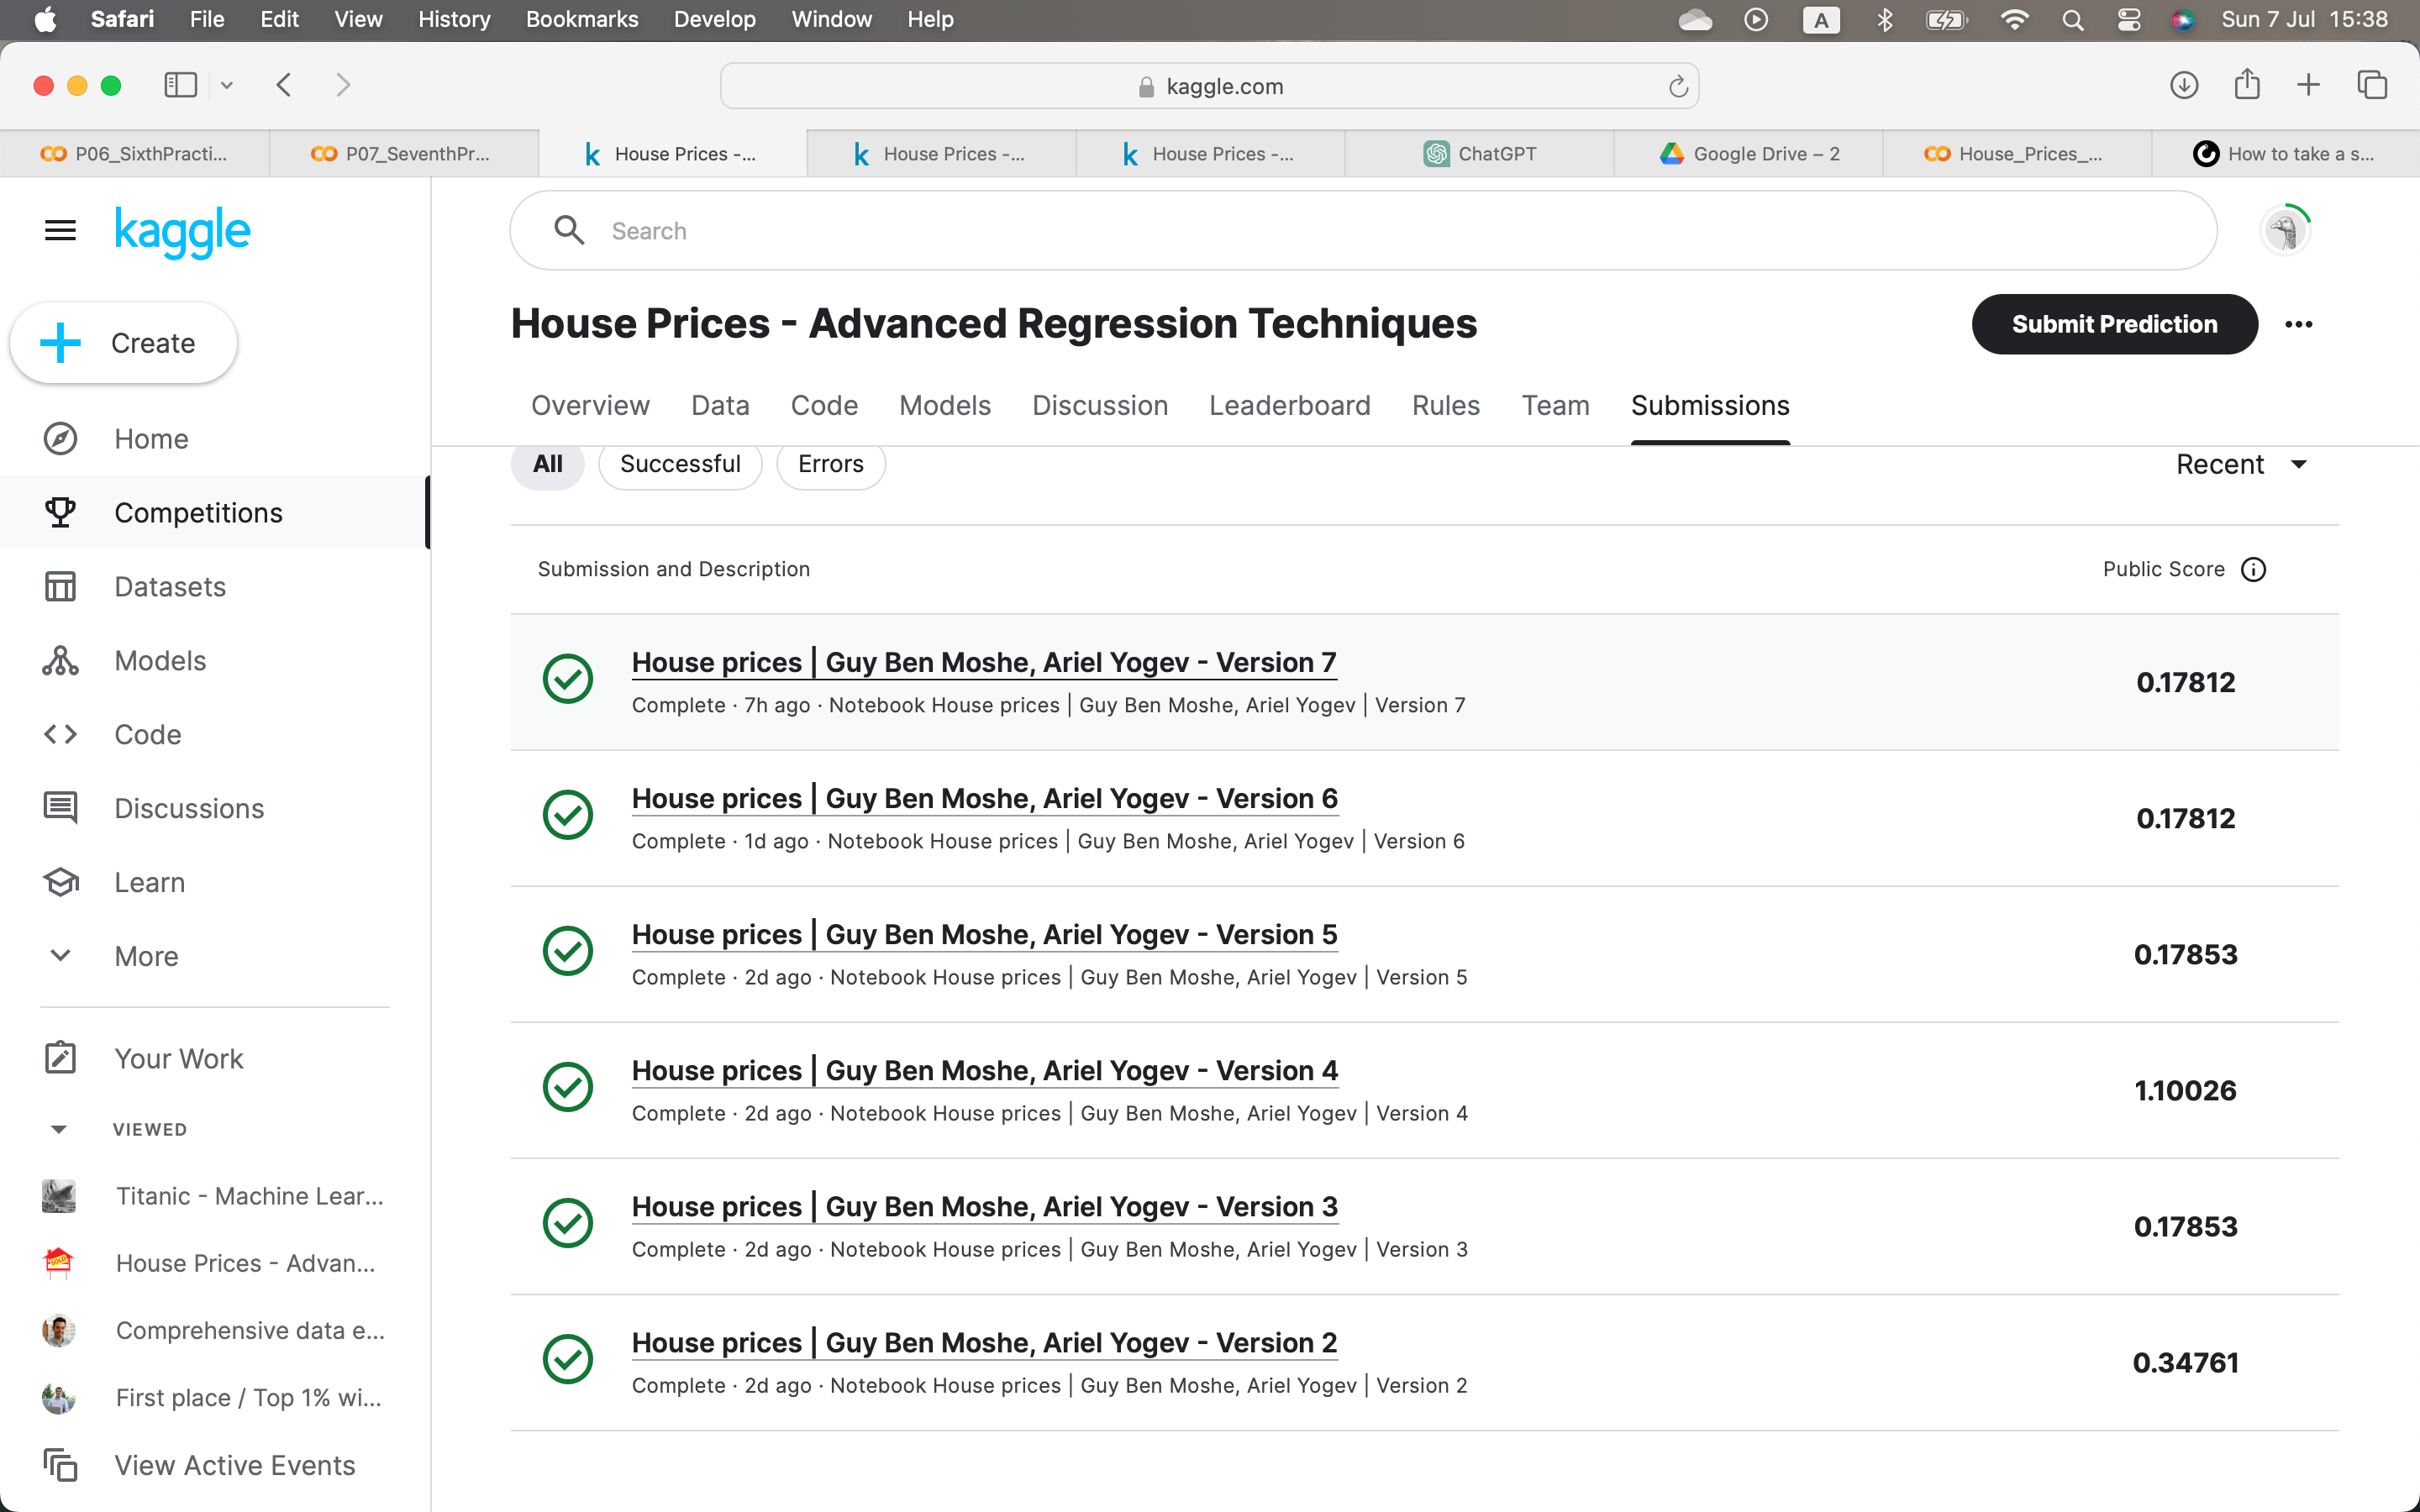

**Conclusions**
> First, we filled empty values with mean and mode filling types.
than, we dropped unrelevant features by low correlation or more than 60% empty values.
we used to models, SGD reggression and Linear regrresion. we came to a conclusion that the liniear regrresion will provide the lowest score so we used that model on our test. weve got good results, the best of them is 0.17812. 
in our notebook you can see graphs, data and markdowens after each code block.
every submmision we tries diffrent things as changing the bounds for low correlation or empty values, we tried diffrent values of k's for Kfold, we tried a diffrent models and etc...
* We didnt add a lot of graphs because we handled the very big amount of features in generic way 

# exercise 4


Ariel Yogev 207917501 Guy Ben Moshe 318363397 

### TL;DR

In this task, our goal is to find the best model for predicting house prices. After analyzing and preparing the data earlier, we'll now focus on optimizing the models we've learned about. We'll test different algorithms like LWLR, KNN, Decision Trees, and SVM to see which one gives the best results. We'll also use PCA to reduce the number of features and create graphs to evaluate accuracy. Finally, we'll use a VotingClassifier to combine the models and determine which combination works best for our predictions.

# LWLR

In [39]:
!git clone https://github.com/qiaochen/CourseExercises

Cloning into 'CourseExercises'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), 248.83 KiB | 1.41 MiB/s, done.


In [40]:
from CourseExercises.lwlr import LWLR
from sklearn.metrics import make_scorer, accuracy_score

# get best k for lwlr (show the calculation of this sell)
hyper_parameters = {'k': list(range(1, 10))}
arr_X= np.asarray(X_selected_features_lr)

gs_lw_model_backward = GridSearchCV(LWLR(k=1), hyper_parameters, 
                           scoring='r2').fit(arr_X, t)

print('R2 score for regression:')
print('gs_lw_model', gs_lw_model_backward.best_score_)
print('best params', gs_lw_model_backward.best_params_)

R2 score for regression:
gs_lw_model 0.85857727129336
best params {'k': 9}


# KNN with grid search

In [41]:
# run KNN on the dataset and find best K by R2 and accuracy
from sklearn.neighbors import KNeighborsRegressor
hyper_parameters_KNN = {'n_neighbors': list(range(1, 20))}

gs_neigh_model_backward = GridSearchCV(KNeighborsRegressor(
    n_neighbors=5, weights='distance'), 
    hyper_parameters_KNN).fit(X_selected_features_lr, t)

print('R2 score for regression:')
print('gs_neigh_model', gs_neigh_model_backward.best_score_)
print('best params', gs_neigh_model_backward.best_params_)
print()

R2 score for regression:
gs_neigh_model 0.777591545485763
best params {'n_neighbors': 12}



# Decision Trees

In [42]:
from sklearn.tree import DecisionTreeRegressor
# Define hyperparameters for tuning
hyper_parameters = {'max_depth': list(range(1, 20)),
                    'min_samples_split': [2, 5, 10, 15, 20],
                    'min_samples_leaf': [1, 2, 4, 8, 12]}

# Initialize and fit the GridSearchCV with DecisionTreeRegressor
gs_tree_model = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                             hyper_parameters).fit(X_selected_features_lr, t)

# Print the results
print('R2 score for regression:')
print('gs_tree_model:', gs_tree_model.best_score_)
print('Best parameters:', gs_tree_model.best_params_)
print()

R2 score for regression:
gs_tree_model: 0.7858174827520806
Best parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10}



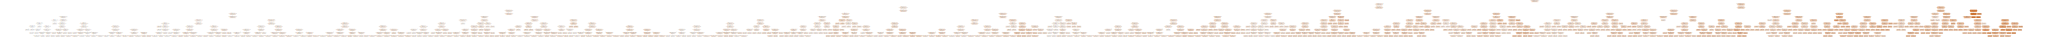

In [43]:
from sklearn import tree
# show the tree in graphics with graphviz
import graphviz 
dot_data = tree.export_graphviz(DecisionTreeRegressor(random_state=42, max_depth=11).fit(X_selected_features_lr, t),
               feature_names=X_selected_features_lr.columns,
               class_names=t.unique(), 
               filled=True, 
               rounded=True)
dot_data = 'digraph Tree {\nsize="200,100";\n' + dot_data[dot_data.find('node'):]  # Correctly place the size attribute
graph = graphviz.Source(dot_data) 
graph

# SVM

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

# Define hyperparameters for tuning
hyper_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto']}
# Initialize and fit the GridSearchCV with SVM (SVR)
gs_svm_model_backward = GridSearchCV(SVR(), hyper_parameters).fit(X_selected_features_lr, t)

# Print the results
print('R2 score for regression:')
print('gs_svm_model:', gs_svm_model_backward.best_score_)
print('Best parameters:', gs_svm_model_backward.best_params_)
print()

R2 score for regression:
gs_svm_model: 0.8135134327549917
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}



**Results Analysis:**
- LWLR (R² = 0.8586) achieved the highest R² score, indicating it captured the relationship between the features and target variable most effectively, likely due to its ability to model local variations in the data.
- SVM (R² = 0.8135) also performed well, showing its strength in handling complex relationships with a well-chosen linear kernel.
- Decision Trees (R² = 0.7858) provided a solid performance, balancing complexity and interpretability but slightly underperformed compared to LWLR and SVM.
- KNN (R² = 0.7776) had the lowest R² score, possibly due to sensitivity to the choice of neighbors and less effectiveness in capturing the data's structure compared to the other models.


**Conclusion:**
LWLR achieved the best results with the highest R² score, making it the most effective algorithm for this specific regression task, likely due to its ability to adapt to local patterns in the data.

# Feature Compression with PCA

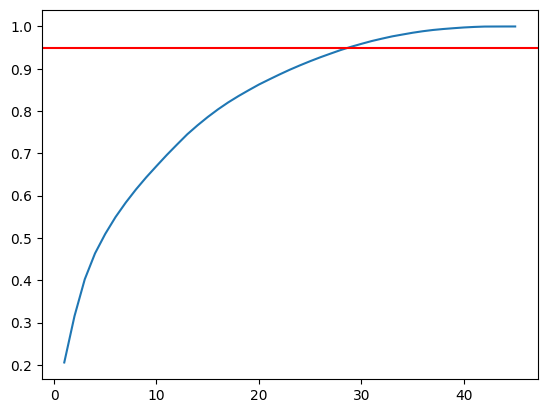

In [45]:
from sklearn.decomposition import PCA

# convert data points to 2dim with pca

num_of_columns = len(X_selected_features_lr.columns)
pca = PCA(n_components=num_of_columns).fit(X_selected_features_lr)
y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(y)+1),y)
plt.axhline(y=0.95, color='r', linestyle='-') # aim to explain higher variance as possible 95%

In [46]:
# Define hyperparameters for tuning
param_grid = {
              'pca__n_components': list(range(1, 20)),
              'SVR__kernel': ['linear', 'rbf', 'poly'],
              'SVR__C': [0.1, 1, 10, 100],
              'SVR__gamma': ['scale', 'auto']}  # Adjust this according to your need, assuming 'k' is a parameter in LWLR

# Define a Pipeline including PCA and LWLR regressor
pipeline = Pipeline([
    ('pca', PCA()),
    ('SVR', SVR())  # Initial 'k' value, will be tuned
])

# Initialize and fit the GridSearchCV with the pipeline
gs_model = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='r2')

# Assuming arr_X_normalized and t are defined and hold your feature set and target variable
# Fit the model
gs_model.fit(X_selected_features_lr, t)

# Print the results
print('R2 score for regression:')
print('gs_model:', gs_model.best_score_)
print('Best parameters:', gs_model.best_params_)

R2 score for regression:
gs_model: 0.8065875155427076
Best parameters: {'SVR__C': 100, 'SVR__gamma': 'auto', 'SVR__kernel': 'linear', 'pca__n_components': 19}


#  Ensembles


* BaggingClassifier
* AdaBoostClassifier
* RandomForest

The best ensemble is the Bagging Regressor, and the best performing version of Bagging Regressor is the one using SGD without bootstrapping.

### Bagging

- without boostrap

In [47]:
# get score with nfold bagging
from sklearn.ensemble import BaggingRegressor

bag_SGD_model = BaggingRegressor(estimator=SGDRegressor(),
                                   n_estimators=20, random_state=42,
                                   bootstrap=False).fit(X_selected_features_lr, t)

print('Accuracy score for classification:')
print('bag_fold_model', bag_SGD_model.score(X_selected_features_lr, t))

Accuracy score for classification:
bag_fold_model 0.8300302976887213


In [48]:
evaluate_model(X_selected_features_lr, bag_SGD_model)

fold_id  split     score          loss
0        0  train  0.824050  32395.373596
1        0    val  0.833631  35722.600901
2        1  train  0.822910  33070.170621
3        1    val  0.828293  34168.411156
4        2  train  0.885608  27272.536420
5        2    val  0.401544  57500.160667
6        3  train  0.822127  33509.607500
7        3    val  0.843680  31329.721180
8        4  train  0.816087  34778.325502
9        4    val  0.870788  25987.948229

mean cv val score: 0.76
mean cv val loss 36941.77
mean cv train score: 0.83
mean cv train loss 32205.20


- with boostrap

In [49]:
# get score with bootstrap bagging
bag_SGD_boot_model = BaggingRegressor(estimator=SGDRegressor(),
                                   n_estimators=20, random_state=42,
                                   bootstrap=True).fit(X_selected_features_lr, t)

print('Accuracy score for classification:')
print('bag_boot_model', bag_SGD_boot_model.score(X_selected_features_lr, t))

Accuracy score for classification:
bag_boot_model 0.8282598339064007


In [50]:
evaluate_model(X_selected_features_lr, bag_SGD_boot_model)

fold_id  split     score          loss
0        0  train  0.816357  33096.012189
1        0    val  0.849547  33970.961975
2        1  train  0.823461  33018.693023
3        1    val  0.841752  32801.938993
4        2  train  0.884328  27424.806808
5        2    val  0.400884  57531.848435
6        3  train  0.821197  33597.026718
7        3    val  0.844369  31260.609480
8        4  train  0.816090  34777.964427
9        4    val  0.870418  26025.081891

mean cv val score: 0.76
mean cv val loss 36318.09
mean cv train score: 0.83
mean cv train loss 32382.90


### Boosting

In [51]:
from sklearn.ensemble import AdaBoostRegressor
# get score with ada boosting

ada_boost_model = AdaBoostRegressor(n_estimators=20, random_state=42).fit(X_selected_features_lr, t)

print('Accuracy score for classification:')
print('ada_boost_model', ada_boost_model.score(X_selected_features_lr, t).mean())

Accuracy score for classification:
ada_boost_model 0.859668073435088


### random forest

In [52]:
# show accuracy of random forest classifier on data
from sklearn.ensemble import RandomForestRegressor

print('RandomForestClassifier score:',
      cross_val_score(
          RandomForestRegressor(random_state=42, max_depth=6),
           X_selected_features_lr, t, cv=15).mean())

RandomForestClassifier score: 0.8339821574938402


## voting

* voting regressors
* voting ensembles


Unsurprisingly, the better voting score is from the voting ensemble. If all your options have better scores individually, it's no surprise that your score is also better when combining them.

### voting regressors

Text(0.5, 1.0, 'CV Negative RMSE Scores')

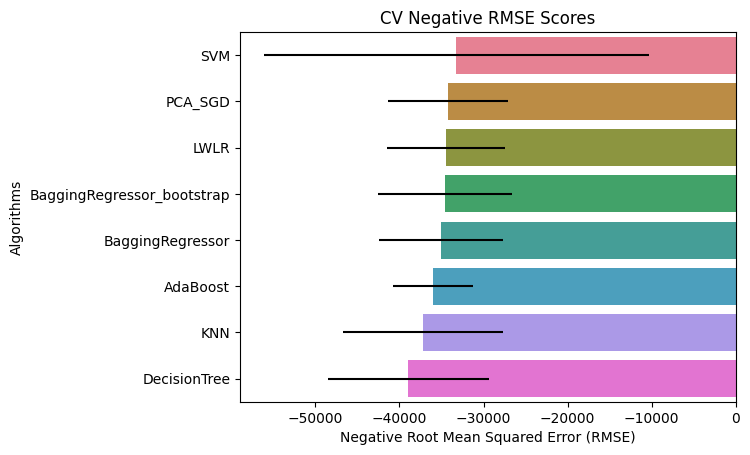

In [53]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns

# Modeling step: Test different algorithms
K_fold = KFold(n_splits=10, shuffle=True, random_state=42)

models = [] 
cv_results = [] 
cv_means = []
cv_std = [] 

models.append(gs_lw_model_backward)
models.append(gs_neigh_model_backward)
models.append(gs_tree_model)
models.append(gs_svm_model_backward)
models.append(gs_model)
models.append(ada_boost_model)
models.append(bag_SGD_boot_model)
models.append(bag_SGD_model)

for model in models:
    cv_results.append(cross_val_score(model, arr_X, t, 
                                       scoring="neg_root_mean_squared_error", cv=K_fold, n_jobs=6))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())  # Taking square root to convert back to RMSE
    cv_std.append(cv_result.std())  # Taking square root to convert back to RMSE

cv_frame = pd.DataFrame(
    {
        "CrossValMeans": cv_means,
        "CrossValErrors": cv_std,
        "Algorithms": ["LWLR",
                     "KNN", 
                     "DecisionTree",
                     "SVM", 
                     "PCA_SGD",
                     "AdaBoost", 
                     "BaggingRegressor_bootstrap",   
                     "BaggingRegressor",]
    })

cv_plot = sns.barplot(x="CrossValMeans", y="Algorithms", data=cv_frame,
                      palette="husl", orient="h", **{'xerr': cv_std},
                      order=cv_frame.sort_values('CrossValMeans', ascending=False).Algorithms)

cv_plot.set_xlabel("Negative Root Mean Squared Error (RMSE)")
cv_plot.set_title("CV Negative RMSE Scores")

In [54]:
from sklearn.ensemble import VotingRegressor

def voting_reg(models):
    vote_reg = VotingRegressor(estimators=models, n_jobs=4)

    vote_reg = vote_reg.fit(X_selected_features_lr, t)

    scores = cross_val_score(vote_reg, X_selected_features_lr, t, cv=K_fold, n_jobs=6, scoring='neg_root_mean_squared_error')

    print("Negative Root Mean Squared Error scores:", scores)
    print("Mean Negative Root Mean Squared Error:", round(np.mean(scores), 2))

    return vote_reg

In [55]:
best_models = [
    ('bag', bag_SGD_model),
    ('Ada_Boost', ada_boost_model),
    ('KNN', gs_neigh_model_backward),
    ('bas_boost', bag_SGD_boot_model)
]

vot_reg_model = voting_reg(best_models)
evaluate_model(X_selected_features_lr, vot_reg_model)

Negative Root Mean Squared Error scores: [-36560.53087152 -29305.175916   -23027.24062673 -36389.02335538
 -39103.66057209 -45360.83157576 -33429.08332143 -26750.54120654
 -25169.92708003 -22520.85299931]
Mean Negative Root Mean Squared Error: -31761.69


fold_id  split     score          loss
0        0  train  0.926617  20921.204374
1        0    val  0.859223  32860.348595
2        1  train  0.927070  21222.342951
3        1    val  0.864416  30362.337282
4        2  train  0.949886  18051.282546
5        2    val  0.571604  48649.183451
6        3  train  0.930006  21020.631240
7        3    val  0.861691  29469.592618
8        4  train  0.925996  22061.234406
9        4    val  0.887711  24226.425766

mean cv val score: 0.81
mean cv val loss 33113.58
mean cv train score: 0.93
mean cv train loss 20655.34


### voting of ensembles

In [56]:
# show accuracy of voting ensemble classifier on data

estimators = [('abr', AdaBoostRegressor(n_estimators=100, random_state=42)), 
              ('rf', RandomForestRegressor(random_state=42, max_depth=6)), 
              ('br', BaggingRegressor(estimator=SGDRegressor(alpha=rs_model.best_params_['alpha'], 
                                                         eta0=rs_model.best_params_['eta0'], 
                                                         penalty=rs_model.best_params_['penalty'], 
                                                         random_state=42),
                                   n_estimators=20, random_state=42,
                                   bootstrap=False)),
              ('svr', gs_svm_model_backward)]

vclf1111 = VotingRegressor(estimators=estimators, weights=[1, 1, 1, 1]).fit(X_selected_features_lr, t)

print('Voting Classifier score:', cross_val_score(vclf1111, X_selected_features_lr, t, cv=15).mean())

Voting Classifier score: 0.8464923468870637


# PCA Implementation for Chosen Models

In [57]:
# Define a Pipeline including PCA and LWLR regressor
pipeline = Pipeline([
    ('pca', PCA()),
    ('vclf', gs_svm_model_backward)
]).fit(X_selected_features_lr,t)


print('Voting Classifier score:', cross_val_score(pipeline, X_selected_features_lr, t, cv=15).mean())

Voting Classifier score: 0.8128142209862211


In [58]:
# Define a Pipeline including PCA and LWLR regressor
pipeline = Pipeline([
    ('pca', PCA()),
    ('vclf', bag_SGD_boot_model)  # Initial 'k' value, will be tuned
]).fit(X_selected_features_lr,t)


print('Voting Classifier score:', cross_val_score(pipeline, X_selected_features_lr, t, cv=15).mean())

Voting Classifier score: 0.8034809058489426


# submission

In [59]:
# create the submission file
submission['SalePrice'] = voting_reg(best_models).predict(test_encoded[X_selected_features_lr.columns])
submission.to_csv('submission2.csv', index=False)
display(submission)

Negative Root Mean Squared Error scores: [-36560.53087152 -29305.175916   -23027.24062673 -36389.02335538
 -39103.66057209 -45360.83157576 -33429.08332143 -26750.54120654
 -25169.92708003 -22520.85299931]
Mean Negative Root Mean Squared Error: -31761.69


Id      SalePrice
0     1461  109291.585731
1     1462  148886.260037
2     1463  175418.646499
3     1464  186637.830837
4     1465  178660.471148
...    ...            ...
1454  2915   80409.202621
1455  2916   76690.017956
1456  2917  133561.157513
1457  2918  119057.431700
1458  2919  239443.645386

[1459 rows x 2 columns]

# Submmisions ScreenShots

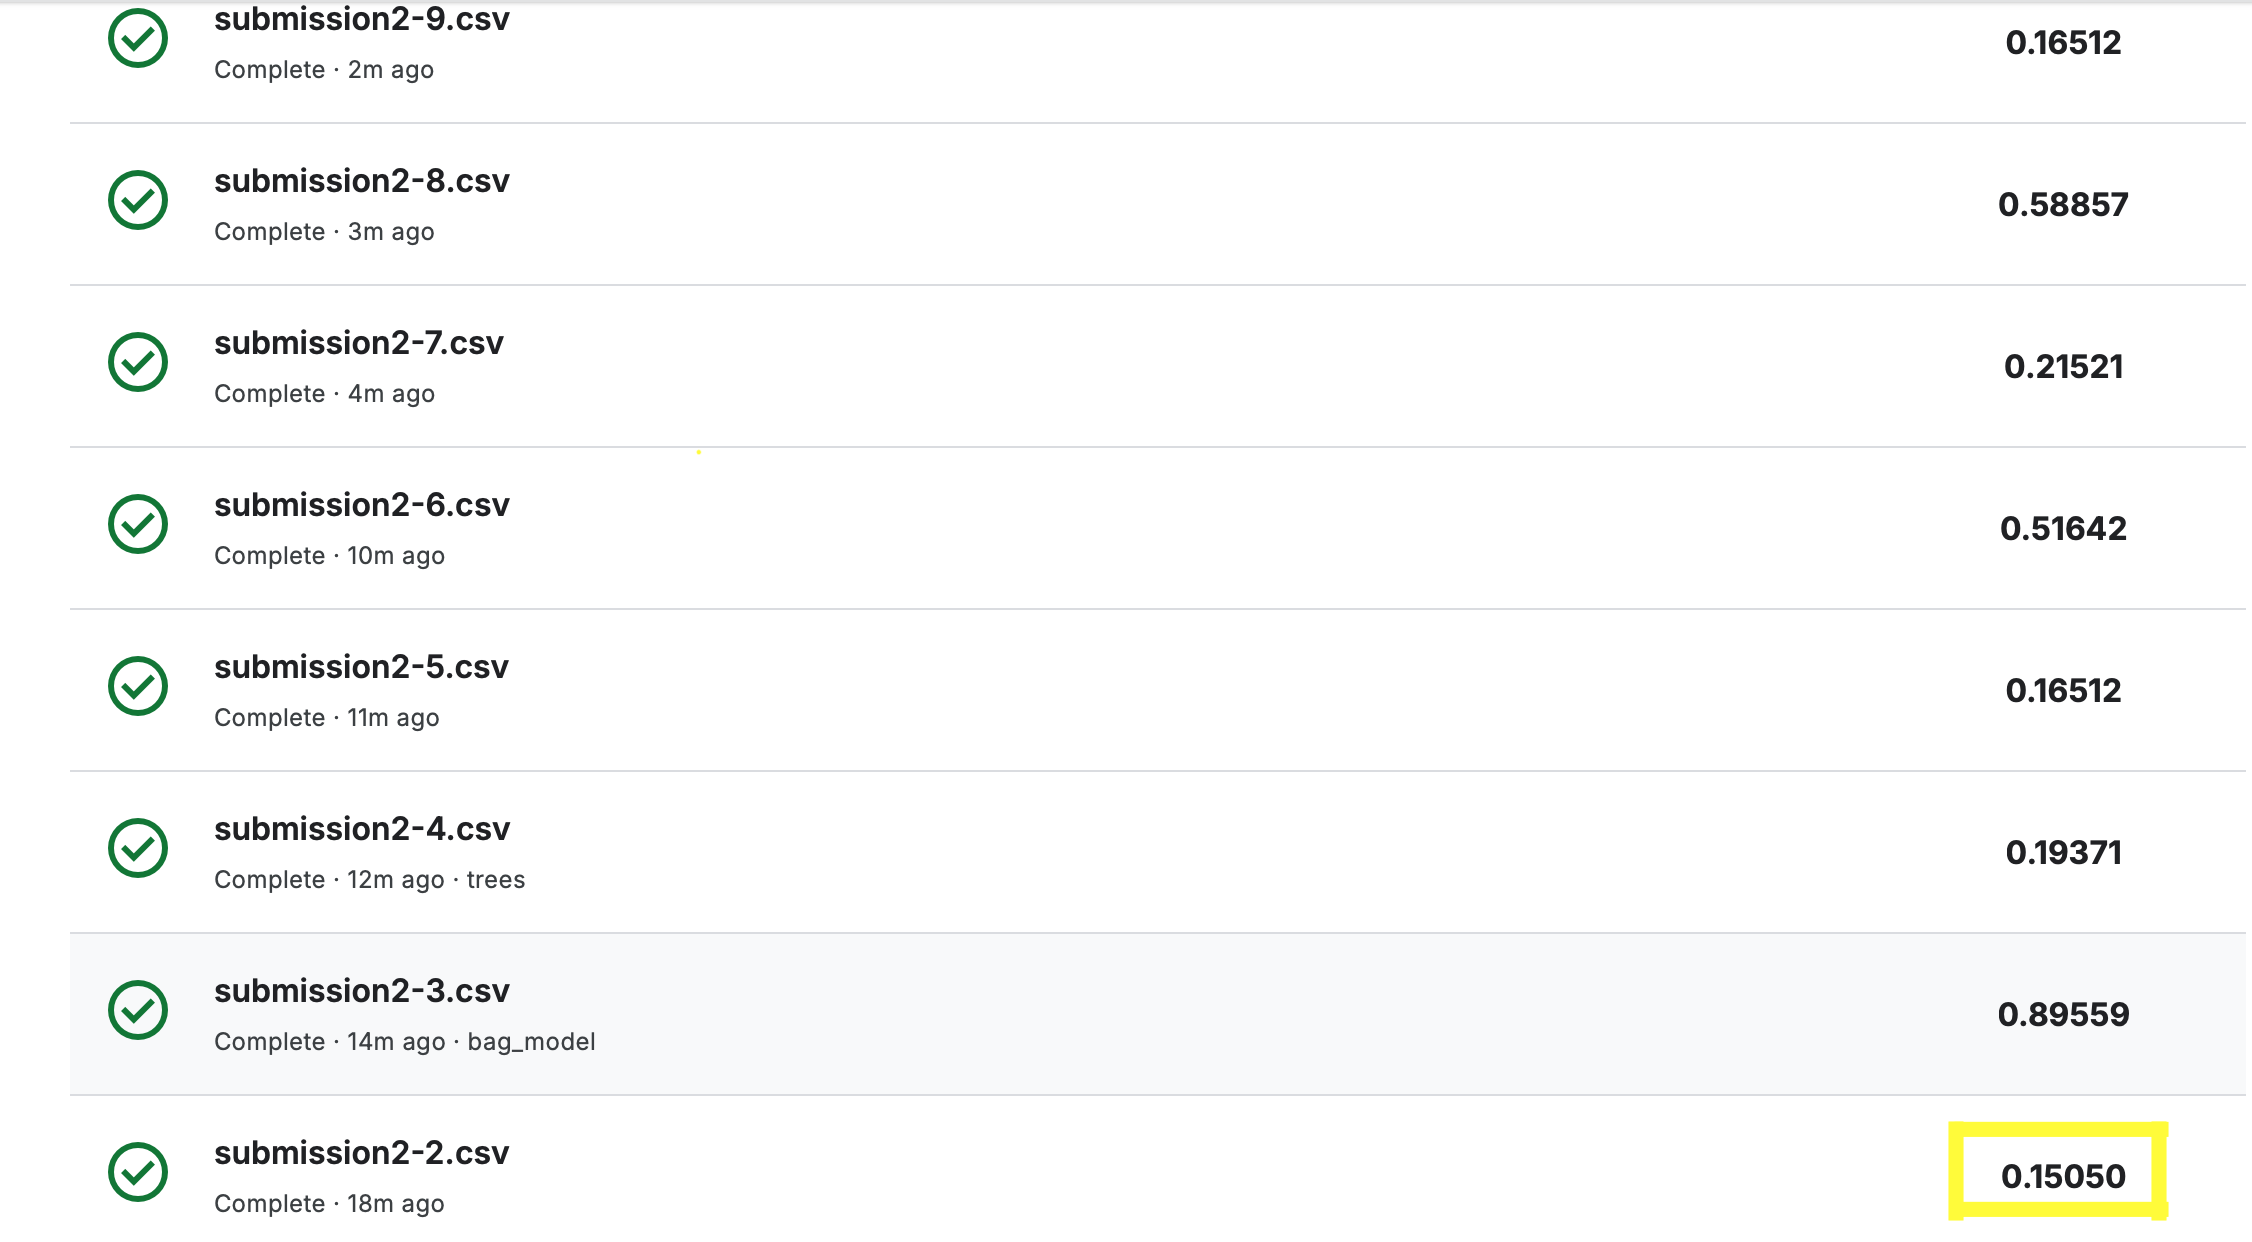

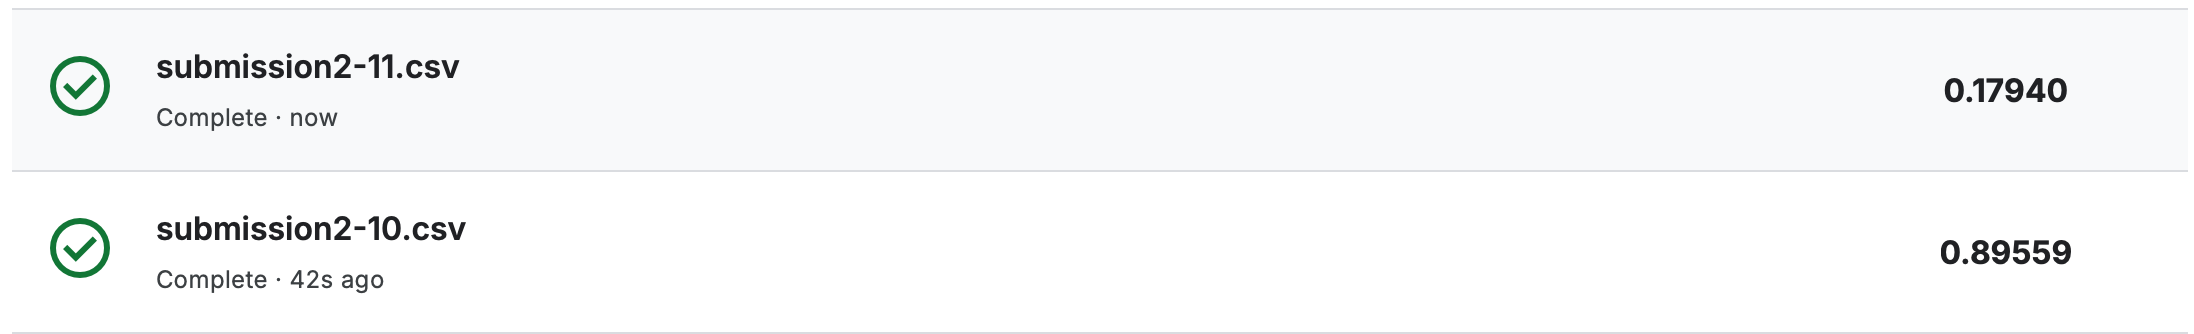

# LeaderBoard

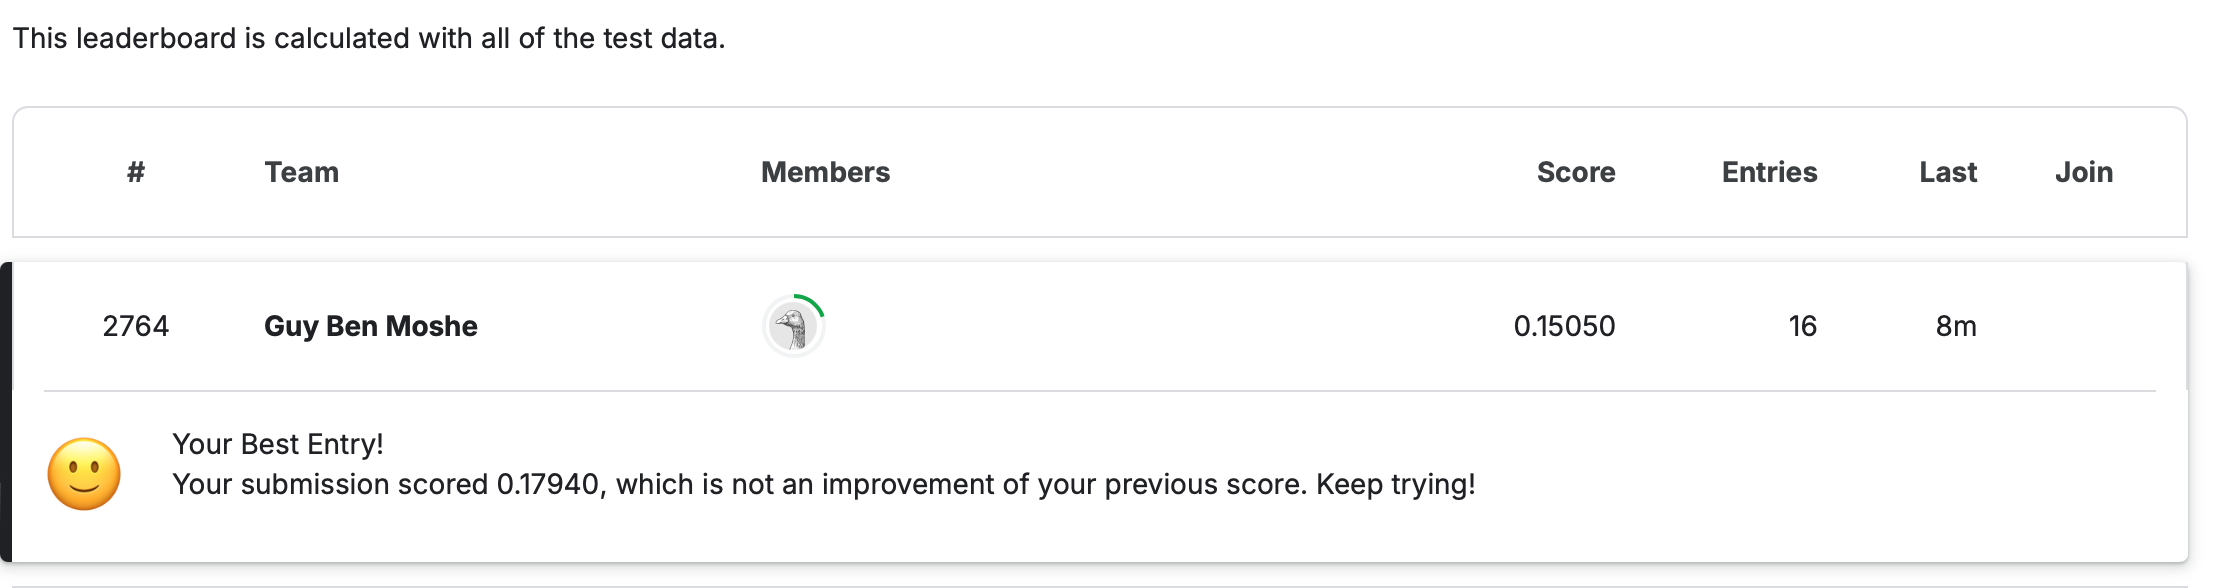

# Project Summary:
In this project, we evaluated various machine learning models to predict house prices, including LWLR, KNN, Decision Trees, SVM, and ensembles like Bagging and Boosting. We also implemented PCA for feature reduction and tested the impact on model performance. The LWLR model achieved the highest R² score of 0.8586, indicating it was particularly effective for this regression task. However, when combining multiple models using Voting Regressors, we achieved a strong balance between accuracy and loss, with a mean cross-validation score of 0.81 and significantly lower training loss.

# Conclusion: 
The Voting Regressor, which aggregates predictions from several models, offers the best overall performance, making it the optimal choice for the final model.